## Final Project Submission

Please fill out:
* Student name: Andrew Rohlman
* Student pace: Full Time
* Scheduled project review date/time: Friday December 21 @ 3:45 PM CT
* Instructor name: Rafael Carrasco
* Blog post URL:

## OSEMN Methodology Summary
The business question being answered in the below analysis is: **"What factors influence the selling price of a home in King County Washingtion?"**

Using the OSEMN Data Science Framework, I have laid out the steps I will take to answer this question. Starting with the first step of OSEMN, "O" Obtain the data, I was given the data set of sold homes in King County for 2014 and 2015. For the next step, "S" Scrub the data, I will going through and review the missing values within the dataset and determine whether I want to remove them, keep them, or replace them. I will also determine in this step if dummy columns will need to be made for categorical variables. The next step, "E" Evaluate the data, I will start looking into linearities between the predictor variables and selling prices to determine what to use for the regression modeling. I will also conduct some exploratory data analysis to create new features to compare to selling prices to add to the regression model. After that, I will "M" Model the data, by using the variable I select in the prior step that best correlate with selling price. Finally, I will "N" iNterpret the results, by review the coefficients of each predictor variable to better understand how they are influencing the selling price of homes.

  

## Importing Libraries

First step I took was importing the necessary Python libraries to run our multiple linear regression.

In [1]:
import pandas as pd #Used for setting up and manipulating our data in a DataFrame

import numpy as np #Used to conduct best fit line calculations and correlation heatmaps

import statsmodels.api as sm #Used to run the OLS multiple regression model
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt #Used for final visualizations
%matplotlib inline

import seaborn as sns #Used for the scatter matrix

import math #Used to engineer a feature showing distance from downtown seattle to each house location
from math import sin, cos, sqrt, atan2, radians

## OSEMN Step 1) Obtain the Data

The below lines of code are used to import the data into a pandas DataFrame, and to give us a high overview of the data to see what we are working with. From reviewing the first few rows of the DataFrame, I am starting to get a sense of what columns are being represented as categorical variables and continuous variables. I am also formulating my initial analysis of the variables I believe will be using to predict housing prices given my basic knowledge of housing valuation.

In [2]:
df = pd.read_csv('kc_house_data.csv') #imports the data into a DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()
print(df.columns)
df.date.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
Index(['id',

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/22/2015     121
4/28/2015     121
4/14/2015     121
7/9/2014      121
4/21/2015     119
6/24/2014     119
8/26/2014     117
10/28/2014    117
7/14/2014     116
5/20/2014     116
7/1/2014      115
8/20/2014     114
4/29/2015     113
6/17/2014     113
7/29/2014     112
4/8/2015      112
7/16/2014     111
5/28/2014     111
4/23/2015     110
8/25/2014     109
8/5/2014      109
3/27/2015     109
8/11/2014     107
7/23/2014     107
             ... 
11/16/2014      3
8/31/2014       3
7/13/2014       3
8/9/2014        2
12/21/2014      2
2/1/2015        2
12/27/2014      2
12/7/2014       2
11/15/2014      2
8/24/2014       2
10/11/2014      2
7/4/2014        2
11/28/2014      2
9/7/2014        2
5/10/2015       2
5/11/2014       2
5/24/2015       1
11/30/2014      1
11/2/2014       1
5/27/2015       1
5/15/2015       1
7/27/2014       1
2/15/2015       1
8/3/2014        1
1/31/2015 

Based on the df.info(), there are 21,597 indexes or rows of information, and 21 columns of data. Going row by row, I can already tell that there is missing information in the waterfront column, view column, and yr_renovated column. Also, I can tell based on the df.head() above, and the df.info() that I will need to adjust some of the column datatypes for the categorical data in order to potentially use them for our regression.

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


After running a df.describe() I am able to go column by column and check the summary statistics. I am looking for where there are outliers in the data, confirming columns that are categorical, and getting an initial sense of the distributions I can expect.

Based on the data above I have so far concluded:

1) The 33 bedrooms seems to be a major outlier in the data and will be considered for removal in our data scrubbing phase.

2) The 8 bathrooms is also a candidate for being an outlier and will be reviewed for removal

3) Waterfront, condition, and grade seem to be categorial pieces of data and will need to be treated in our next steps.

4) The price distribution at first glance is looking like a positively skewed distribution, given that the mean is larger than the median, but will be further reviewed in the next few steps.

## OSEMN Step 2) Scrub the Data

As noticed above, there are missing datapoints in the waterfront, view, and yr_renovated columns. Below is the percentages of data missing from each column.

In [5]:
print('Waterfront')
print (df.waterfront.isna().sum() / df.id.value_counts().sum()) # % of data missing
print(df.waterfront.value_counts()) # all the value types from each column
print('View')
print (df.view.isna().sum() / df.id.value_counts().sum())
print(df.view.value_counts())
print('Year Renovated')
print (df.yr_renovated.isna().sum() / df.id.value_counts().sum())
print(df.yr_renovated.value_counts())




Waterfront
0.11001527989998611
0.0    19075
1.0      146
Name: waterfront, dtype: int64
View
0.0029170718155299346
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
Year Renovated
0.17789507802009538
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0  

Given that the waterfront values are heavily skewed towards houses with no waterfronts, I am going to remove all the NaN's from this column.

Given that there are only 63 NaN's for the view column out of over 21,000 rows, I am going to remove all the NaN's from the column as well.

The yr_renovated column for an initial look might be used for a predictor variable, so I do not want to lose a lot of data points from this column. I am initially going to replace all NaN's in this column to 0's, making an assumption that no renovations have been made for these houses.

The below code does the above commands

In [6]:
df.yr_renovated = df.yr_renovated.fillna(value=0) #Changes all NaN's in yr_renovated to 0's
df = df.dropna() #drops all the rows containing NaN's from the DataFrame
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Now that all the missing data is cleaned, I will now treat the categorical variables to be used for a linear regression. My approach will be to create dummy columns for each of the categorical variables I determined above (condition, grade, and waterfront)

In [7]:
df.condition = df.condition.astype('category') #changes the column data type to category from an int
df.grade = df.grade.astype('category') #changes the column data type to category from an int
df.waterfront = df.waterfront.astype(int) #changes the column data type to an int from an float. Python will now read this row as a true false

#Below code creates dummy columns for each categorical variable
dum_grade = pd.get_dummies(df.grade,prefix = 'grade')
dum_condition = pd.get_dummies(df.condition,prefix='condition')
dum_waterfront = pd.get_dummies(df.waterfront,prefix='waterfront')

data = pd.concat([df, dum_grade,dum_condition,dum_waterfront],axis=1) #adding the dummy columns to a new DataFrame with the original data
data.shape



(19164, 39)

## OESMN Step 3) Explore the Data

Now that the data is cleaned and the categorical variables are treated for, I am starting to determine what independent variables I want to analyze to best predict housing prices. I like to compare scatter plots for linearity between variables, but given that there are so many variables that can be considered, **"How could I best determine a starting point for high correlation between variables and the house price?"** I decided to start with a correlation heatmap to get a top selection to observe scatterplots afterwards.

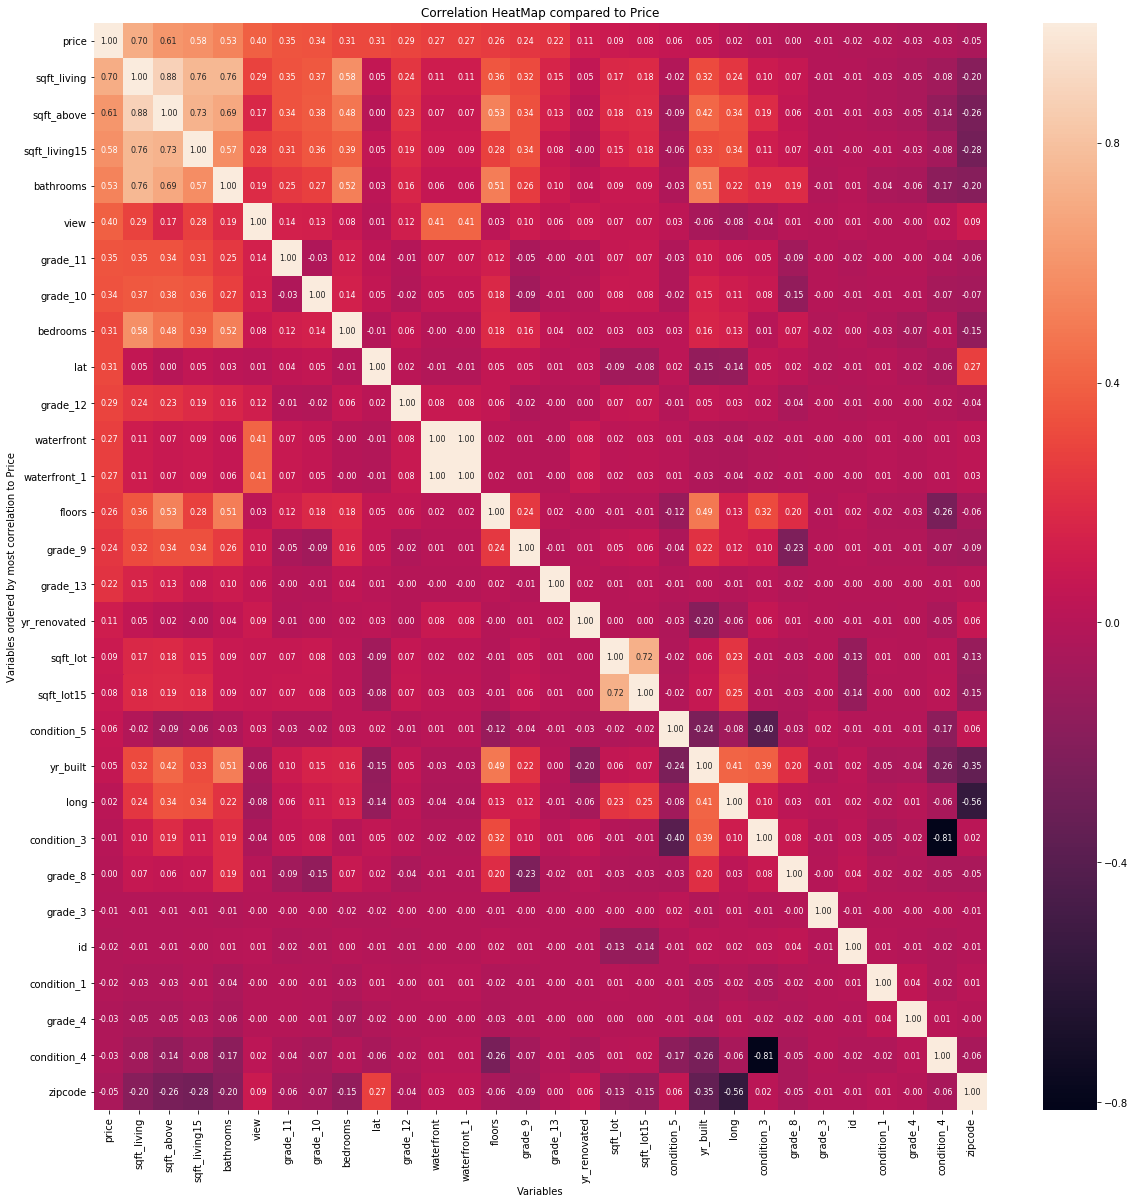

In [8]:
k = 30 #number of variables for heatmap
plt.figure(figsize=(20,20))
corr=data.corr()
corrcolumns = corr.nlargest(k, 'price')['price'].index #orders the heatmap largest to smallest compared to prices
cm = np.corrcoef(data[corrcolumns].values.T)
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=corrcolumns.values, xticklabels=corrcolumns.values)
plt.title('Correlation HeatMap compared to Price')
plt.ylabel('Variables ordered by most correlation to Price')
plt.xlabel('Variables')           
plt.show()

Based on the heatmap, I have determined for a starting analysis that I will dive into the following variables:

1)sqft_living

2)sqft_above

3)sqft_living15

4)bathrooms

5)grade

6)bedrooms

7)latitude coordinates

8)floors

Below I created a scatter matrix with these variables to compare to prices. My conclusions from reviewing the matrix:

1) There are a couple of outliers I want to remove from the data to better fit our modeling

2) There is a lot of collinearity appearing between my initial variables that have strong correlation with price.

(ex: sqft_living vs sqft_above vs sqft_living15 vs bathrooms)


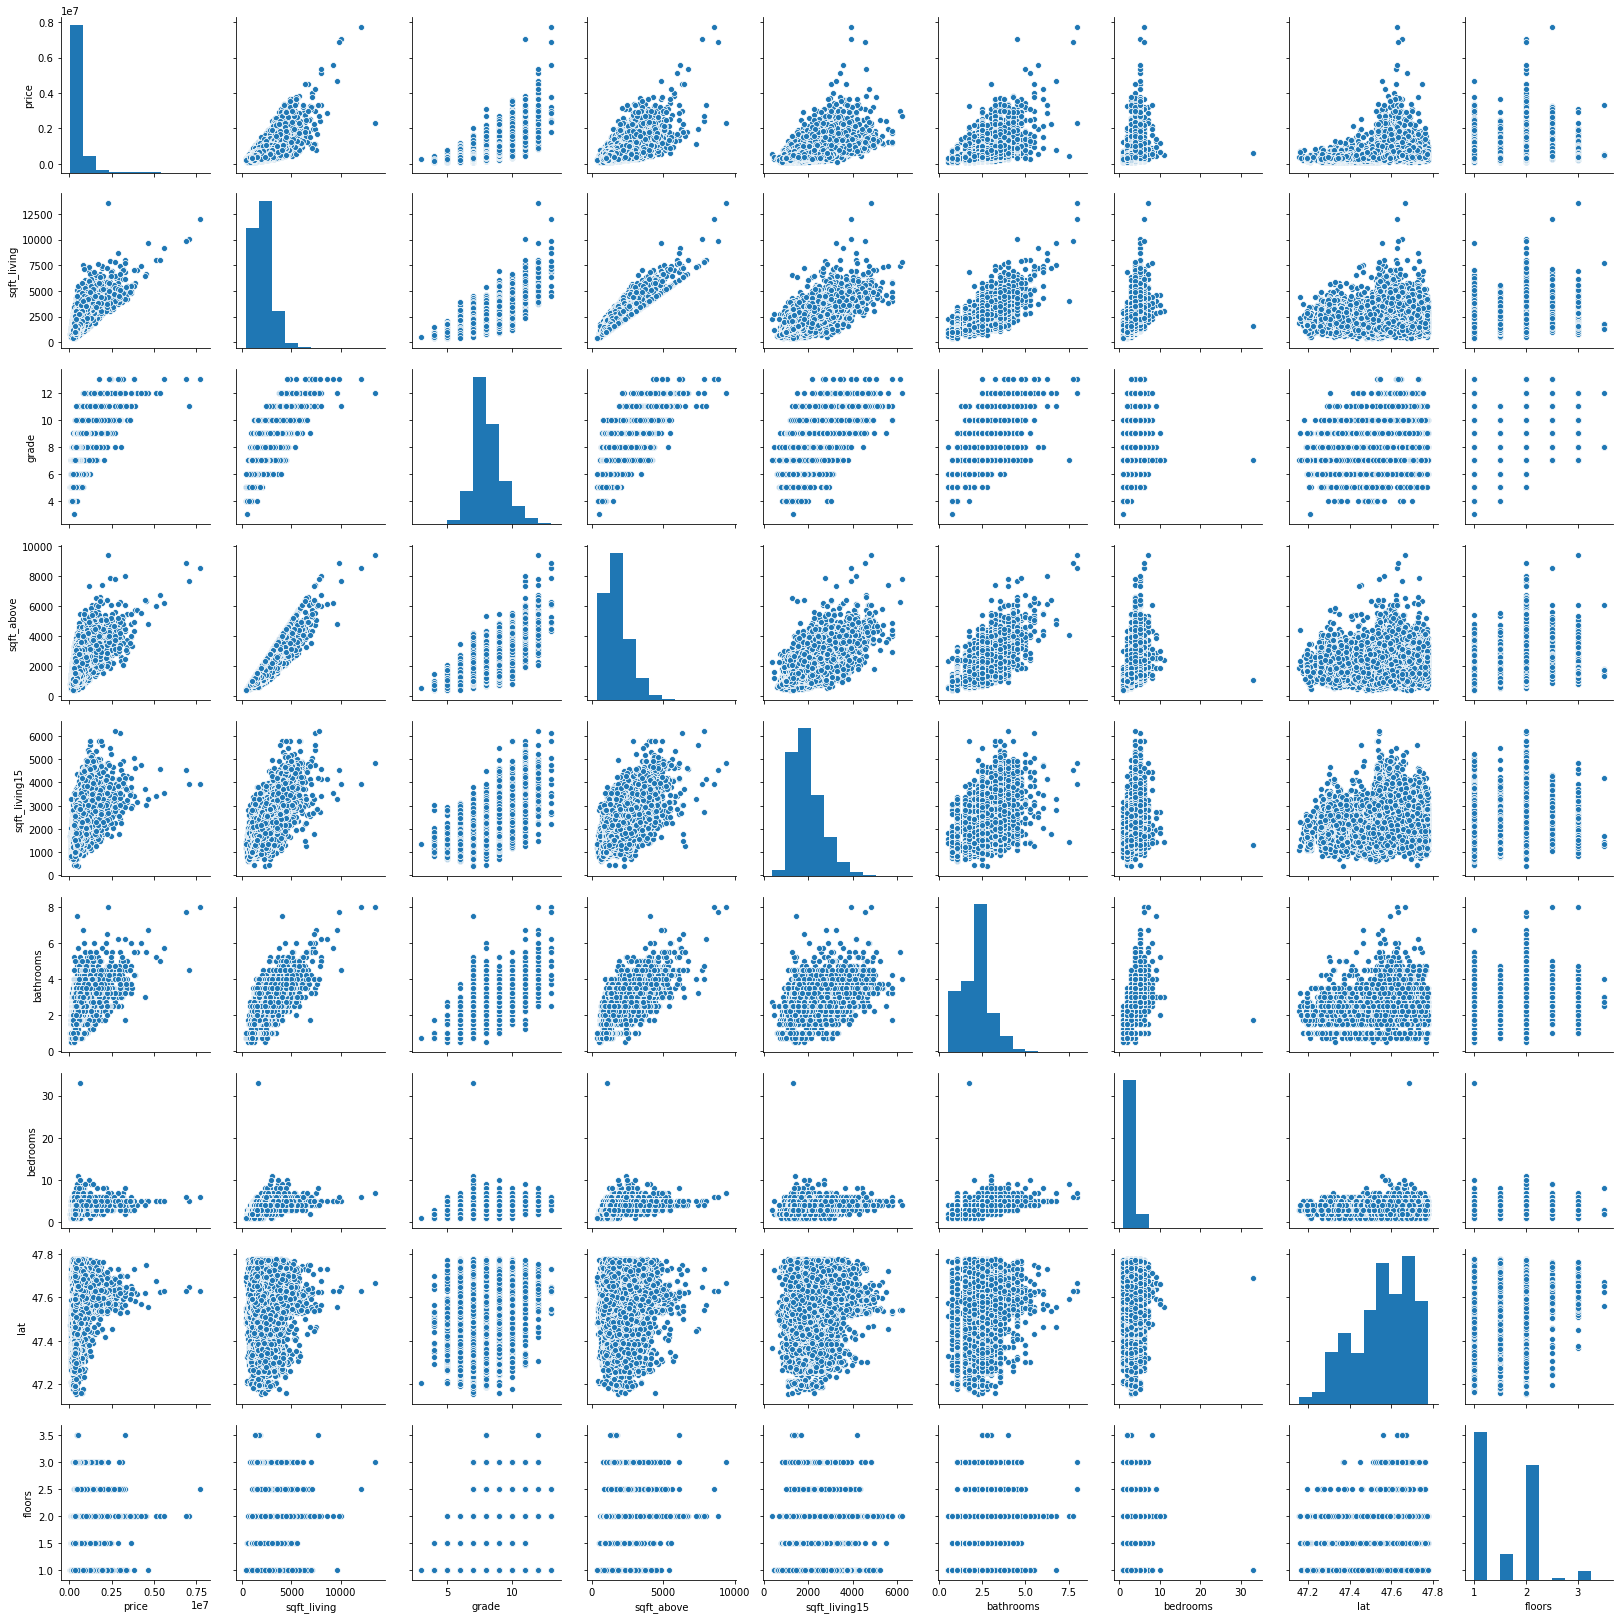

In [9]:
sns.pairplot(df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'lat', 'floors']])


This is the code I used to remove my outliers

In [10]:
df.nlargest(3, 'price') #the three most expensive houses are outliers and I decided to remove them

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730


In [11]:
data = data.drop(df[df.bedrooms ==33].index) #this is the max found in the df.describe()
data = data.drop(df[df.sqft_living ==13540].index) #this is the max found in the df.describe()
data = data.drop(df[df.price==7700000].index)
data = data.drop(df[df.price==7060000].index)
data = data.drop(df[df.price==6890000].index)

Given the collinearity of a lot of the highly correlate data (refer to the correlation heatmap and scatter matrix), I narrowed down my variables for testing to the follow independent variables:

1) sqft_living - It makes sense that a house would be priced according to how large it was

2) bedrooms - similar to sqft_living, but the correlation between these two variables seemed small enough that it could benefit my modeling without violating collinearity

3) floors - typically houses with more than 2 floors are more expensive

4) lat - I want to look into this more and try to normalize the house's positions by comparing their position to a specific baseline location. I wrote some code below to look more into this.

5) grade - there is a strong correlation between what King County housing grades are and their selling price.


Before I moved onto modeling, I wanted to dig a little more into some of the variables. One question I had was: **'Does yard size of the lot have strong correlation on the selling price of the house?'**

To answer this question, below I created a function that subtracts out the lot size of the property to the square footage the house is taking up. Houses that are split level (showing a floor level of 2.5 for example) is going to tweak a little bit of the results, but I think we still should be able to get a sense of the yards influence on the selling price

In [12]:
def backyard (basement,floors,sqft_above,sqft_lot):
    if basement == 0:
        d = sqft_lot - (sqft_above / floors)
    else:
        d = sqft_lot - (sqft_above / floors - 1)
    
    return d
    
data['sqft_backyard'] = data.apply(lambda row: backyard(row['sqft_basement'],row['floors'],row['sqft_above'],row['sqft_lot']),axis=1)

                  price  sqft_backyard
price          1.000000       0.082244
sqft_backyard  0.082244       1.000000


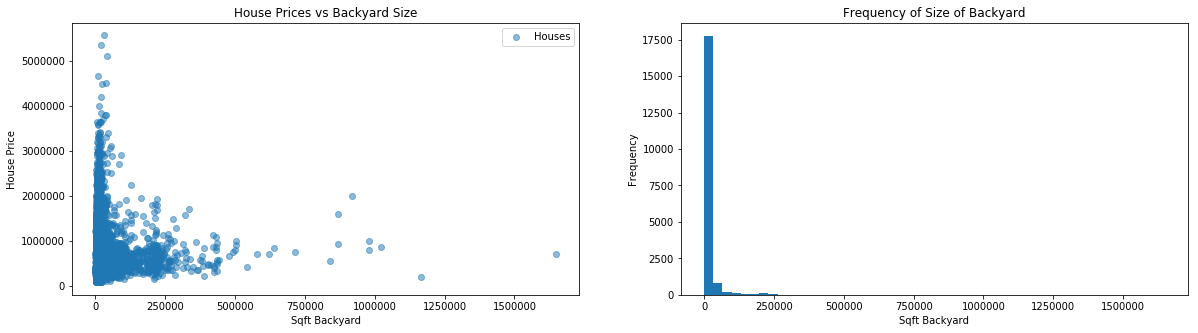

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(data.sqft_backyard,data.price, alpha=0.5,label='Houses')
plt.title('House Prices vs Backyard Size')
plt.xlabel('Sqft Backyard')
plt.ylabel('House Price')
plt.legend()
plt.subplot(122)
plt.hist(data.sqft_backyard,bins=50)
plt.title('Frequency of Size of Backyard')
plt.xlabel('Sqft Backyard')
plt.ylabel('Frequency')
corr_check = data[['price','sqft_backyard']]
print(corr_check.corr())

Based on these results, it is showing that there is very little correlation to the backyard size and the selling price of the house in King County (correlation of 0.08).

Below I also decided to write some code to create a column in our DataFrame that gives the distance in kilometers from each house to the center of downtown Seattle, to create a proper baseline for each house's position. My question is: **"Is there a correlation between distance that a home is to downtown Seattle and house selling price?"** My thought is that the closer a house is to Seattle, the more expensive it will get

In [14]:
def distance(lat1,long1):
    
    lat2 = 47.6062 #latitude of downtown Seattle
    long2= -122.3321  #longitude of downtown Seattle
    radius = 6371 # approximate radius of earth in km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(long2-long1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

data['dist_seattle'] = data.apply(lambda row: distance(row['lat'],row['long']),axis=1)


                price  dist_seattle
price         1.00000      -0.29212
dist_seattle -0.29212       1.00000


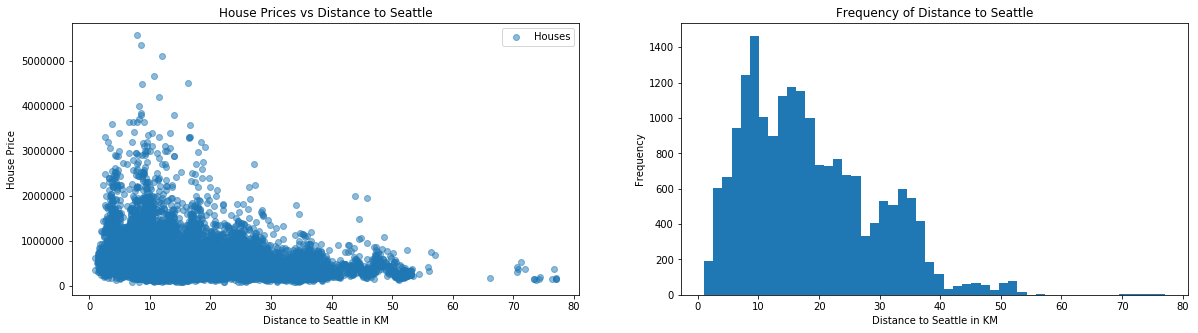

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(data.dist_seattle,data.price, alpha=0.5,label='Houses')
plt.title('House Prices vs Distance to Seattle')
plt.xlabel('Distance to Seattle in KM')
plt.ylabel('House Price')
plt.legend()
plt.subplot(122)
plt.hist(data.dist_seattle,bins=50)
plt.title('Frequency of Distance to Seattle')
plt.xlabel('Distance to Seattle in KM')
plt.ylabel('Frequency')
corr_check = data[['price','dist_seattle']]
print(corr_check.corr())


The above charts show the distance of each house to downtown Seattle, compared to housing prices. I also printed the correlation between the two variables. According to the scatter plot and correlation results, there is a negative correlation between housing prices and distance to Seattle (i.e. the farther the house is from Seattle, the cheaper the prices. The correlation value (~0.3) is similar to that of each home's latitude, and I plan to use this feature as part of our initial model, since it normalizes the house positions to a baseline, as well as includes longitude in the modeling.

So now that I have some variable I want to test in running a multiple regression, I will need to normalize the variables to get a more normal distribution if they don't have one already. By reviewing the histograms above for the variables I will be using for the model, almost all of them show a positive skewed distribution. Below is the code I wrote to log transform the data to represent a more normal distribution. A also scaled all the data points to reduce the effects of their measuring units magnitudes.

In [16]:
data_log = pd.DataFrame([]) #these lines of code are log transforming the variable data points to represent a more normal distribution

data_log["sqft_living"] = np.log(data["sqft_living"])
data_log["bedrooms"] = np.log(data["bedrooms"])
data_log["floors"] = np.log(data["floors"])
data_log["dist_seattle"] = np.log(data["dist_seattle"])
data_log["lat"] = np.log(data["lat"])


new_df = pd.DataFrame([]) #after a log transforming them, I then scaled them to be at the same size.
new_df['price']= (data.price-min(data.price))/(max(data.price)-min(data.price))
new_df['sqft_living'] = (data_log.sqft_living-min(data_log.sqft_living))/(max(data_log.sqft_living)-min(data_log.sqft_living))
new_df['floors'] = (data_log.floors-min(data_log.floors))/(max(data_log.floors)-min(data_log.floors))
new_df['dist_seattle'] = (data_log.dist_seattle-min(data_log.dist_seattle))/(max(data_log.dist_seattle)-min(data_log.dist_seattle))
new_df['bedrooms'] = (data_log.bedrooms-min(data_log.bedrooms))/(max(data_log.bedrooms)-min(data_log.bedrooms))
new_df['lat'] = (data_log.lat-min(data_log.lat))/(max(data_log.lat)-min(data_log.lat))

final_df = pd.concat([new_df,dum_grade],axis=1) #our DataFrame to use for testing
final_df = final_df.dropna()



The final_df DataFrame contains the data I will be using to run the multiple regression

## OSEMN Step 4) Model the Data

With my predictor variables normalized, I am ready to run my OLS Multiple Regression model. Again, my predictor variables I chose are:

1) sqft_living - the more square footage of living space, the more expensive the house

2) floors - the more number of floors, the more expensive the house

3) bedrooms - the more bedrooms, the more expensive

4) grade - the higher the King County housing grade, the more expensive

5) dist_seattle - the closer to downtown Seattle, the more expensive the house

In [17]:
model = 'price ~ sqft_living+floors+dist_seattle+bedrooms+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'
ols(formula=model, data=final_df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2797.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:55:15   Log-Likelihood:                 35627.
No. Observations:               19159   AIC:                        -7.122e+04
Df Residuals:                   19144   BIC:                        -7.111e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1488      0.004     39.263      0.000       0.141       0.156
sqft_living      0.2139      0.004     54.448      0.000       0.206       0.222
floors          -0.0152      0.001    -13.547      0.000      -0.017      -0.013
dist_seattle    -0.1467      0.002    -80.389      0.000      -0.150      -0.143
bedrooms        -0.0258      0.003     -8.216      0.000      -0.032      -0.020
grade_3         -0.0048      0.035     -0.139      0.889      -0.073       0.063
grade_4         -0.0568      0.008     -7.353      0.000      -0.072      -0.042
grade_5         -0.0700      0.004    -16.752      0.000      -0.078      -0.062
grade_6         -0.0810      0.004    -23.075      0.000      -0.088      -0.074
grade_7         -0.0793      0.003    -23.250      0.000      -0.086      -0.073
grade_8         -0.0676      0.003    -19.779      0.000      -0.074      -0.061
grade_9         -0.0396      0.003    -11.345      0.000      -0.046      -0.033
grade_10         0.0021      0.004      0.584      0.559      -0.005       0.009
grade_11         0.0586      0.004     14.864      0.000       0.051       0.066
grade_12         0.1793      0.005     34.232      0.000       0.169       0.190
grade_13         0.3078      0.011     27.984      0.000       0.286       0.329
==============================================================================
Omnibus:                    12718.999   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           411644.427
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.043   Cond. No.                     1.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We have a model that we can say with 95% confidence can account for about 67% of the variability within housing prices. (our R2 is at .67) I think that this is a great first step of our modeling, but I would like to see how the model changes if instead of us using the distance to seattle, we used the value of how far north a house is to its selling price (i.e. using latitude)

In [18]:
model2 = 'price ~ sqft_living+floors+lat+bedrooms+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_11+grade_12+grade_13'
ols(formula=model2, data=final_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2457.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:55:20   Log-Likelihood:                 34363.
No. Observations:               19159   AIC:                        -6.870e+04
Df Residuals:                   19145   BIC:                        -6.859e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0223      0.003      7.754      0.000       0.017       0.028
sqft_living     0.1814      0.004     43.555      0.000       0.173       0.190
floors         -0.0085      0.001     -7.110      0.000      -0.011      -0.006
lat             0.0759      0.001     57.440      0.000       0.073       0.078
bedrooms       -0.0237      0.003     -7.063      0.000      -0.030      -0.017
grade_4        -0.0658      0.008     -7.883      0.000      -0.082      -0.049
grade_5        -0.0750      0.003    -22.206      0.000      -0.082      -0.068
grade_6        -0.0801      0.002    -39.622      0.000      -0.084      -0.076
grade_7        -0.0810      0.002    -50.137      0.000      -0.084      -0.078
grade_8        -0.0695      0.001    -46.743      0.000      -0.072      -0.067
grade_9        -0.0420      0.002    -27.317      0.000      -0.045      -0.039
grade_11        0.0591      0.002     23.693      0.000       0.054       0.064
grade_12        0.1830      0.005     38.918      0.000       0.174       0.192
grade_13        0.3200      0.012     26.160      0.000       0.296       0.344
==============================================================================
Omnibus:                    13126.568   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           379877.165
Skew:                           2.903   Prob(JB):                         0.00
Kurtosis:                      24.027   Cond. No.                         63.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, dist_seattle provide us with more explanation to the variability of housing prices than latitude by about 5% (R2 of .67 compared to an R2 of about .62). I believe this is becuase of the inclusion of longitude into the equation, as well as setting a baseline distance to compare each house to each other.

At this point we will use the first model for our Regression Model.

Below is a quick model validation looking at a test data set of 20% of our data, with our training set being the other 80%.

In [19]:
y = final_df[["price"]]
X = final_df.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #Splits the data set into 80/20

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0013576518043210586
Test Mean Squarred Error: 0.001427539539932373


Seeing that our train MSE and test MSE are very similar, our model is considered valid.

## OSEMN Step 5) Interpret the Results

In conclusion of the multiple regression analysis, Model 1 is my current selection as a good model to predict the selling price of a home in King County given the following variables:

1) Square footage of the home

2) The number of floors the home has (including basement)

3) The grade King County gives the home

4) The number of bedrooms the home has

5) The distance the home is from downtown Seattle

Model 1, with 95% confidence, can account for about 67% of the variability in selling price of a home in King County, Washington. One of the biggest variables in the selling price of the home, the square footage, has a positive coefficient, meaning that the larger the house, the higher the selling price. Also, the change in selling price of a home based on it's King County grade doesnt have positive influence unless its grade is 10 or above, as the coefficients turn positive after grade 9. Finally, the selling price of homes decrease the farther they are in distance away from Seattle, as the coefficient is negative. All of these results intuitively make sense

## Next Steps


After going through the OSEMN for this data set. There are a few items for recommended follow ups I would have liked to pursue given more time or additional resources:

1) Given more time to complete this analysis, I would have liked to gather more accurate information on the Waterfront variable (more homes on a waterfront). I am assuming off the bat that a home on waterfront is going to sell at a higher price than a home that isn't, and would have been a good variable to use. But I did not have enough confidence to use the current data, since the count of homes on waterfront was very small in our dataset that there would currently be no significance in using it.

2) It would be interesting to gather information on districting for King County. For example, if houses are locked into schooling districts, to be able to see how that effects home prices would be an interesting pursuit.

3) Given more time, I would have standardize my code so that we could repeat this analysis with different variables with more ease (less rewriting of the code).